In [1]:
import main 
import matplotlib.pyplot as plt
%matplotlib inline  
import analyse_tool 
import numpy as np
import simulation
from timeit import Timer

# Profling:

in respect to length

In [39]:
time_python=[]
time_cpp=[]
for i in np.logspace(1,21,num=21,base=2):
    timec=Timer(lambda: analyse_tool.Analyse(D=2,particles=1,length=int(i),alpha=0.5,dt=1,version='cpp').compute_trajectory())
    timep=Timer(lambda: analyse_tool.Analyse(D=2,particles=1,length=int(i),alpha=0.5,dt=1).compute_trajectory())
    time_python.append(timep.timeit(number=1))
    time_cpp.append(timec.timeit(number=1)/3)


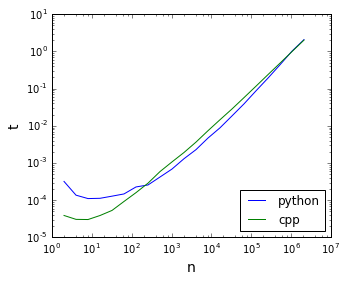

In [41]:
plt.figure(figsize=(5,4))
a=np.logspace(1,21,num=21,base=2)
plt.loglog(a,time_python,label="python")
plt.loglog(a,time_cpp,label="cpp")
plt.xlabel('n',fontsize=14)
plt.ylabel('t',fontsize=14)
plt.legend(loc=4,)
plt.savefig('midtermreport/data/profiling_length.png',dpi=300)   # save the figure to file 
plt.show()


in respect to particle number:

In [9]:
time_python=[]
time_cpp=[]
for i in np.logspace(1,15,num=20,base=2):
    timec=Timer(lambda: analyse_tool.Analyse(D=2,particles=int(i),length=100,alpha=0.5,dt=1,version='cpp').compute_trajectory())
    timep=Timer(lambda: analyse_tool.Analyse(D=2,particles=int(i),length=100,alpha=0.5,dt=1).compute_trajectory())
    time_python.append(timep.timeit(number=1))
    time_cpp.append(timec.timeit(number=1)/3)


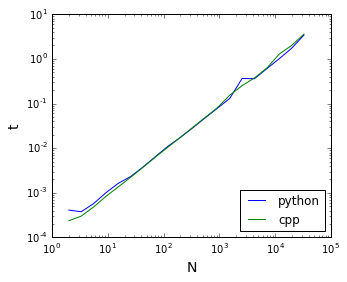

In [10]:
plt.figure(figsize=(5,4))
a=np.logspace(1,15,num=20,base=2)
plt.loglog(a,time_python,label="python")
plt.loglog(a,time_cpp,label="cpp")

plt.xlabel('N', fontsize=14)
plt.ylabel('t', fontsize=14)
plt.legend(loc=4)
plt.savefig('midtermreport/data/profiling_particle.png',dpi=300)   # save the figure to file 

plt.show()


# Analyse:

python vs cpp

In [45]:
e=analyse_tool.Analyse(D=2,particles=5000,length=2000,alpha=0.5,dt=1)
msd,std=e.msd_ensemble()
d=analyse_tool.Analyse(D=2,particles=5000,length=2000,alpha=0.5,dt=1,version='cpp')
msd1,std1=d.msd_ensemble()


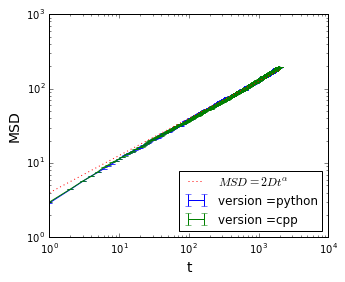

In [47]:
msd_text='MSD=2 D t^\\alpha'

plt.figure(figsize=(5,4))
plt.errorbar(e.t*e.dt, msd, yerr=std*0,label="version =%s" %(e.version))
plt.errorbar(d.t*d.dt, msd1, yerr=std1*0,label="version =%s" %(d.version))
plt.loglog(d.t*d.dt,e.msdanalyt(),":", label="$%s$  " %(msd_text))
plt.xlabel('t', fontsize=14)
plt.ylabel('MSD', fontsize=14)
plt.legend(loc=4)
plt.savefig('midtermreport/data/msd_python_cpp.png',dpi=300)   # save the figure to file 
plt.show()

## only cpp-version:

MSD  ensemble average vs time average vs time-ensemble-average:

In [6]:
d=analyse_tool.Analyse(D=2,particles=5000,length=000,alpha=0.5,dt=1,version='cpp')
msd1,std1=d.msd_ensemble()
e=analyse_tool.Analyse(D=2,particles=1,length=8000,alpha=0.5,dt=1,version='cpp')
msd,std=e.msd_time()


0
1
2
3
4
5
6
7
8
9


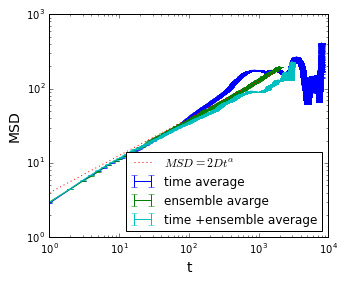

In [8]:
msd_text='MSD=2 D t^\\alpha'

plt.figure(figsize=(5,4))
plt.errorbar(e.t*e.dt, msd, yerr=std*0,label="time average")
plt.errorbar(d.t*d.dt, msd1, yerr=std1*0,label="ensemble avarge")
plt.loglog(d.t*d.dt,d.msdanalyt(),":", label="$%s$  " %(msd_text))
X=main.plot_ensemble_mean_of_time_msd()
plt.xlabel('t', fontsize=14)
plt.ylabel('MSD', fontsize=14)
plt.legend(loc=4)
plt.savefig('midtermreport/data/averages_comparison.png',dpi=300)   # save the figure to file 
plt.show()

change dt:

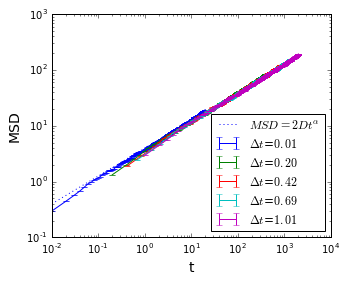

In [49]:
msd_text='MSD=2 D t^\\alpha'
t='t=\\Delta t \\cdot n'
colors=['r','b','g','k','c','w','b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
plt.figure(figsize=(5,4))

for i in (np.logspace(0,1,num=5,base=2)-0.99):
    e=analyse_tool.Analyse(D=2,particles=2000,length=2000,alpha=0.5,dt=i,version="cpp")
    msd,std=e.msd_ensemble()
    plt.errorbar(e.t*e.dt, msd, yerr=0,label="$\\Delta t$=$%.2f $" %(e.dt))

e=analyse_tool.Analyse(D=2,particles=2000,length=2000,alpha=0.5,dt=0.01,version="cpp")
plt.loglog(e.t*e.dt,e.msdanalyt(),":",color=colors[1], label="$%s$" %(msd_text))
plt.xlabel('t', fontsize=14)
plt.ylabel('MSD', fontsize=14)
plt.legend(loc=4)
plt.savefig('midtermreport/data/dt_change.png',dpi=300)   # save the figure to file 

plt.show()

change alpha:

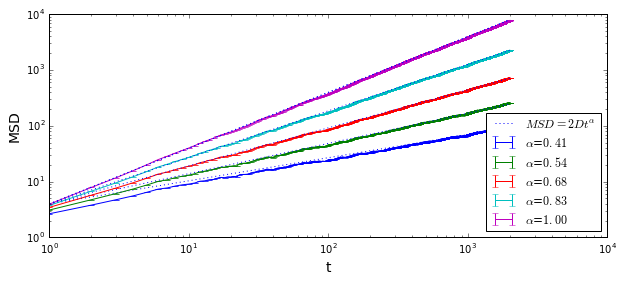

In [52]:
msd_text='MSD=2 D t^\\alpha'
t='t=\\Delta t \\cdot n'
colors=['r','b','g','k','c','w','b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
plt.figure(figsize=(10,4))
for i in (np.logspace(0.5,1,num=5,base=2)-1):
    e=analyse_tool.Analyse(D=2,particles=2000,length=2000,alpha=i,dt=1,version="cpp")
    msd,std=e.msd_ensemble()
    plt.errorbar(e.t*e.dt, msd, yerr=0,label="$\\alpha $=$%.2f $" %(e.alpha))
    plt.loglog(e.t*e.dt,e.msdanalyt(),":",color=colors[1])

plt.loglog(e.t*e.dt,e.msdanalyt(),":",color=colors[1], label="$%s$ " %(msd_text))
plt.xlabel('t', fontsize=14)
plt.ylabel('MSD', fontsize=14)
plt.legend(loc=4)
plt.savefig('midtermreport/data/alpha_change.png',dpi=300)   # save the figure to file 

plt.show()

zeit rückwärts vs. vorwärt

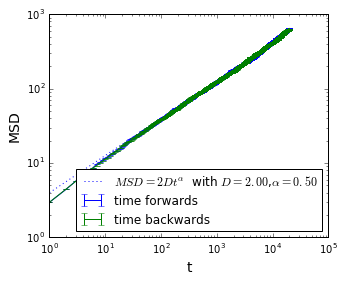

In [54]:
msd_text='MSD=2 D t^\\alpha'
t='t=\\Delta t \\cdot n'
colors=['r','b','g','k','c','w','b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
plt.figure(figsize=(5,4))
e=analyse_tool.Analyse(D=2,particles=5000,length=20000,alpha=0.5,dt=1)
msd,std=e.msd_ensemble()
plt.errorbar(e.t*e.dt, msd, yerr=msd*0,label="time forwards")
plt.loglog(e.t*e.dt,e.msdanalyt(),":",color=colors[1], label="$%s$  with $D=%.2f$,$\\alpha=%.2f$" %(msd_text,e.D,e.alpha))
e.invert_time()
msd1,std1=e.msd_ensemble()
plt.errorbar(e.t*e.dt, msd1, yerr=msd1*0,label= "time backwards")
plt.xlabel('t', fontsize=14)
plt.ylabel('MSD', fontsize=14)
plt.legend(loc=4)
plt.savefig('midtermreport/data/backwards.png',dpi=300)   # save the figure to file 

plt.show()

fractional brownian scaling:

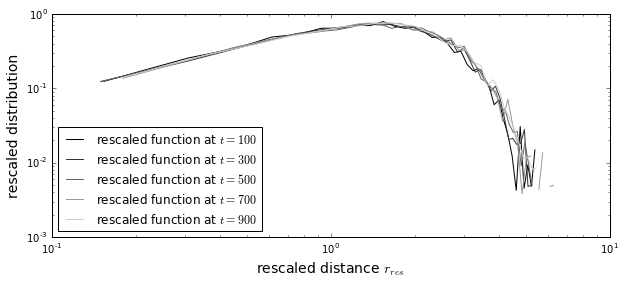

In [4]:
plt.figure(figsize=(10,4))
main.show_rescaled()
   # save the figure to file 


non-gaussian parameter:

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


analyse_tool.py:131: RuntimeWarning: invalid value encountered in divide
  nongaussianparamter=(1/3.)*moment4/moment2poten2-1


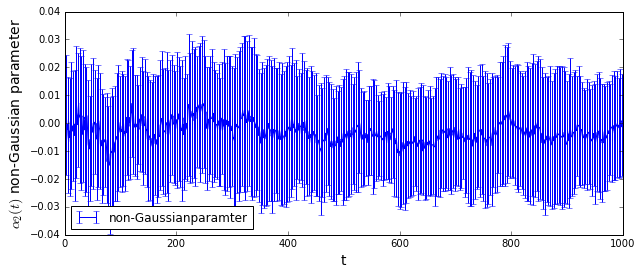

In [2]:
plt.figure(figsize=(10,4))
main.show_gaussian()

Show ,vor explain, how this amrocivan aproximation trick changes outcome
